In [7]:
from IPython.display import IFrame, HTML

# Specify the URL of the page you want to display
url = 'https://www.janestreet.com/puzzles/beside-the-point-index/'

iframe_html = f'''
<style>
.responsive-iframe {{
    position: relative;
    overflow: hidden;
    width: 100%;
    padding-top: 56.25%; /* 16:9 Aspect Ratio */
}}

.responsive-iframe iframe {{
    position: absolute;
    top: 0;
    left: 0;
    width: 90%;
    height: 90%;
}}
</style>
<div class="responsive-iframe">
    <iframe src="{url}" frameborder="0" allowfullscreen></iframe>
</div>
'''

HTML(iframe_html)

# 1. Setup of the Square and Points
Let the square be the unit square $[0,1] \times [0,1]$. The two points are:
- **Blue point**: $(x_b, y_b)$
- **Red point**: $(x_r, y_r)$

Both points are uniformly distributed within the square.

# 2. Closest Point on the Boundary
For any point $(x_b, y_b)$, the closest point on the boundary is determined by projecting the blue point orthogonally to the nearest side. 

Since we are assuming that the square is located in the first quadrant we can determine the closes side of the square using c = $min\left(y_b, x_b, 1 - y_b, 1 - x_b\right)$ :

- If $c = y_b$ (bottom side).
- If $c = x_b$ (left side).
- If $c = 1-y_b$ (top side).
- If $c = 1 - x_b$ (right side).

# 3. Perpendicular Bisector Equation

To see if there is a point in the closest boundary that is equidistant to both points R and B we must see if the perpendicular bisector (locus of equidistant points from A and B) intersects such closest boundary. The perpendicular bisector is the line perpendicular to the segment AB that passes through the midpoint. Let's construct it: 

The midpoint M is given by: $\left( \frac{x_r + x_b}{2}, \frac{y_r + y_b}{2} \right)$

The direction vector of the line segment ( AB ) is: $(x_b - x_r, y_b - y_r)$

The perpendicular direction to $(x_b - x_r, y_b - y_r)$ can be $(y_r - y_b, x_b - x_r)$.

Using the midpoint and the perpendicular direction vector, the equation of the perpendicular bisector is: 

$$y - \frac{y_r + y_b}{2} = -\frac{x_b - x_r}{y_b - y_r} \left( x - \frac{x_r + x_b}{2} \right)$$

This line is the locus of points equidistant from A and B and passes through their midpoint.

## We can try to simulate the process to obtain the probability

In [18]:
# Libraries

import numpy as np
import matplotlib.pyplot as plt
from decimal import Decimal, getcontext

In [20]:
def x_intersection(y,R,B):
    x_r, y_r = R
    x_b, y_b = B

    x = -((y_b - y_r)/(x_b - x_r))*(y-(y_r + y_b)/2) + (x_r + x_b)/2
    return x

def y_intersection(x, R, B):
    x_r, y_r = R
    x_b, y_b = B

    # Handle the case where points A and B have the same y-coordinate
    if y_r == y_b:
        return (x_r + x_b) / 2  # Return the x-coordinate of the vertical bisector

    y = (y_r + y_b) / 2 - ((x_b - x_r) / (y_b - y_r)) * (x - (x_r + x_b) / 2)
    return y

# Set the precision to 10 decimal places
getcontext().prec = 10


def simulate_probability(num_samples=10**7):
    """
    Simulate the probability that the perpendicular bisector of the line joining
    two random points intersects the side of the square closest to the blue point.
    """
    count = 0

    for _ in range(num_samples):
        # Randomly generate the blue point (x_b, y_b) and red point (x_r, y_r)
        x_b, y_b = np.random.uniform(0, 1), np.random.uniform(0, 1)
        x_r, y_r = np.random.uniform(0, 1), np.random.uniform(0, 1)
        
        # Determine the closest side of the square to (x_b, y_b)
        distances = [y_b, x_b, 1 - y_b, 1 - x_b]  # [bottom, left, top, right]
        closest_side = np.argmin(distances)  # Index of the closest side
        
        # Calculate the perpendicular bisector
        # (x - x_b)(x_r - x_b) + (y - y_b)(y_r - y_b) = 0
        dx = x_r - x_b
        dy = y_r - y_b
        
        # Check intersection with the closest side
        intersects = False
        if closest_side == 0:  # Bottom side (y = 0)
            # Solve for x when y = 0
            if dy != 0:
                x_intersect = x_intersection(0,(x_r,y_r),(x_b,y_b))
                if 0 <= x_intersect <= 1:
                    intersects = True
        elif closest_side == 1:  # Left side (x = 0)
            # Solve for y when x = 0
            if dx != 0:
                y_intersect = y_intersection(0,(x_r,y_r),(x_b,y_b))
                if 0 <= y_intersect <= 1:
                    intersects = True
        elif closest_side == 2:  # Top side (y = 1)
            # Solve for x when y = 1
            if dy != 0:
                x_intersect = x_intersection(1,(x_r,y_r),(x_b,y_b))
                if 0 <= x_intersect <= 1:
                    intersects = True
        elif closest_side == 3:  # Right side (x = 1)
            # Solve for y when x = 1
            if dx != 0:
                y_intersect = y_intersection(1,(x_r,y_r),(x_b,y_b))
                if 0 <= y_intersect <= 1:
                    intersects = True

        # Count if there was an intersection
        if intersects:
            count += 1

    # Estimate probability
    return count / num_samples

# Simulate the probability with the corrected logic
prob = Decimal(simulate_probability())
print(prob)


0.49134990000000000609503558735013939440250396728515625


## Let's also graph the square and the bisector

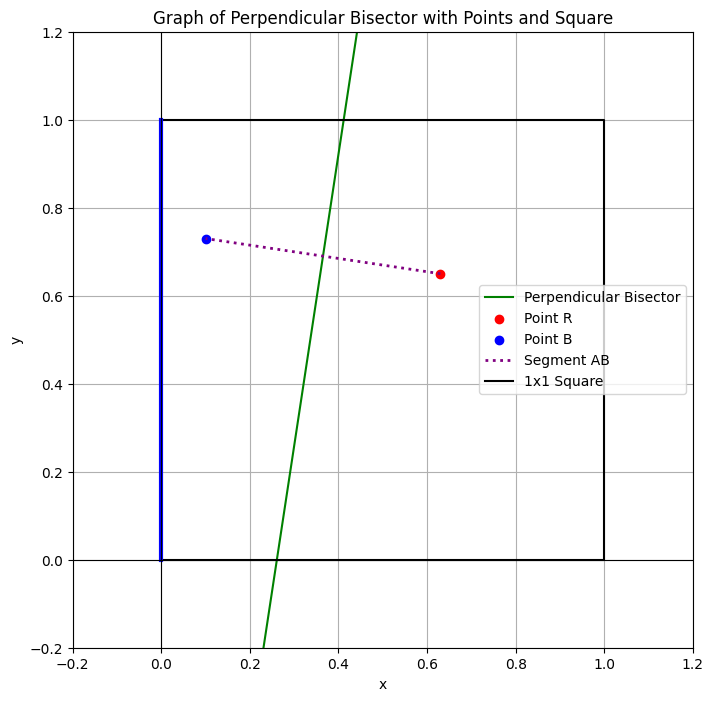

In [ ]:
def graph_bisector_in_square(R,B):

    # Calculate distances from point B to each side of the square
    dist_bottom = B[1] - 0
    dist_top = 1 - B[1]
    dist_left = B[0] - 0
    dist_right = 1 - B[0]

    # Determine the closest side
    distances = [dist_bottom, dist_top, dist_left, dist_right]
    closest_side = distances.index(min(distances))


    # Generate x values within the range of the square
    x_values = np.linspace(-2, 2, 400)

    # Check if points R and B have the same y-coordinate
    if R[1] == B[1]:
        # Calculate the x-coordinate of the vertical bisector
        bisector_x = y_intersection(None, R, B)
        # Define y values for the vertical line
        y_values = np.linspace(-2, 2, 400)
    else:
        # Calculate y values using the function
        y_values = [y_intersection(x, R, B) for x in x_values]

    # Plot the function
    plt.figure(figsize=(8, 8))
    if R[1] == B[1]:
        plt.plot([bisector_x] * len(y_values), y_values, label='Perpendicular Bisector', color='green')
    else:
        plt.plot(x_values, y_values, label='Perpendicular Bisector', color='green')

    # Plot points R and B
    plt.scatter(*R, color='red', label='Point R')
    plt.scatter(*B, color='blue', label='Point B')

    # Draw the dotted line segment between points R and B
    plt.plot([R[0], B[0]], [R[1], B[1]], color='purple', linestyle=':', linewidth=2, label='Segment AB')

    # Draw the 1x1 square
    square_x = [0, 1, 1, 0, 0]
    square_y = [0, 0, 1, 1, 0]
    plt.plot(square_x, square_y, color='black', label='1x1 Square')

    # Highlight the closest side in blue
    if closest_side == 0:  # Bottom
        plt.plot([0, 1], [0, 0], color='blue', linewidth=3)
    elif closest_side == 1:  # Top
        plt.plot([0, 1], [1, 1], color='blue', linewidth=3)
    elif closest_side == 2:  # Left
        plt.plot([0, 0], [0, 1], color='blue', linewidth=3)
    elif closest_side == 3:  # Right
        plt.plot([1, 1], [0, 1], color='blue', linewidth=3)

    # Set the limits to center the plot on the square
    plt.xlim(-0.2, 1.2)
    plt.ylim(-0.2, 1.2)

    # Add titles and labels
    plt.title('Graph of Perpendicular Bisector with Points and Square')
    plt.xlabel('x')
    plt.ylabel('y')

    # Add grid, legend, and axes lines
    plt.axhline(0, color='black', linewidth=0.8)
    plt.axvline(0, color='black', linewidth=0.8)
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.show()


# Define the points R and B
R = (0.63, 0.65)  # Example point R
B = (0.1, 0.73)  # Example point B 

graph_bisector_in_square(R,B)

# Analytical solution

However, the problem asks for the probability with a precision of 10 decimal places. In Monte Carlo simulations, the standard error of the mean, which measures the precision of the estimate, is inversely proportional to the square root of the number of simulations (N). Mathematically, this relationship is given by:
$$\text{Standard Error} \approx \frac{\sigma}{\sqrt{N}}$$

To achieve a precision of 10 decimal places, the standard error needs to be on the order of (10^{-10}). Assuming that (\sigma) is approximately 1 (a common assumption for normalized variables), we set up the inequality:

$$\frac{1}{\sqrt{N}} \leq 10^{-10}$$

Solving for (N), we square both sides:

$$ \frac{1}{N} \leq 10^{-20} \Longrightarrow  N \geq 10^{20} $$

Therefore, approximately $10^{20}$ simulations are needed to achieve a precision of 10 decimal places if the standard deviation of the underlying distribution is about 1.

Of course it is not feaseble to carry out this many simulations in a regular computer so **an analytical solution is needed.**

Given a uniformly selected point we want to find the region of the square where the other point must lie so that the perpendicular bisector 

Without loss of generality we can assume that the blue point lies within the lower left octant of teh square (orange triangle in the graph). For the bisector to intersect the bottom side of the square, the red point mus lie within the symmetric difference of two circles centered at the bottom vertices of the square that pass through the first point.



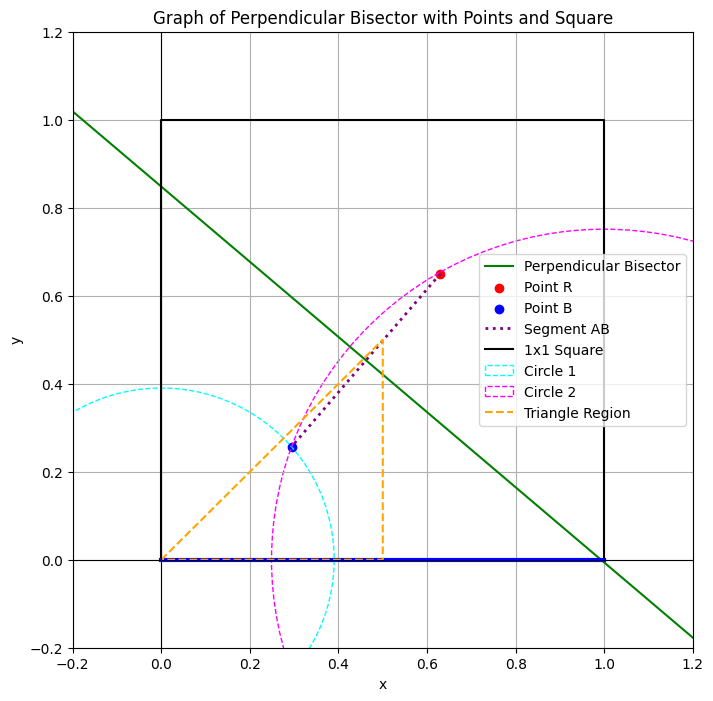

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

# Define the function for y-intersection of the perpendicular bisector
def y_intersection(x, R, B):
    x_r, y_r = R
    x_b, y_b = B
    # Handle the case where points R and B have the same y-coordinate
    if y_r == y_b:
        return (x_r + x_b) / 2  # Return the x-coordinate of the vertical bisector
    y = (y_r + y_b) / 2 - ((x_b - x_r) / (y_b - y_r)) * (x - (x_r + x_b) / 2)
    return y

# Function to simulate blue points inside the defined triangle
def simulate_blue_point():
    while True:
        x = np.random.uniform(0, 0.5)
        y = np.random.uniform(0, 1)
        if y <= x and y <= -x + 1:
            return (x, y)

# Function to add a clipped circle
def add_clipped_circle(ax, center, radius, color, label):
    circle = patches.Circle(center, radius, color=color, fill=False, linestyle='--', label=label)
    ax.add_patch(circle)
    # Clip the circle to the square's boundaries
    ax.set_clip_path(patches.PathPatch(patches.Path([(0,0), (1,0), (1,1), (0,1), (0,0)])))

# Main function to graph the setup
def graph_bisector_in_square(R, B):
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # Calculate distances from point B to each side of the square
    dist_bottom = B[1] - 0
    dist_top = 1 - B[1]
    dist_left = B[0] - 0
    dist_right = 1 - B[0]
    
    # Determine the closest side
    distances = [dist_bottom, dist_top, dist_left, dist_right]
    closest_side = distances.index(min(distances))
    
    # Generate x values within the range of the square
    x_values = np.linspace(-2, 2, 400)
    
    # Check if points R and B have the same y-coordinate
    if R[1] == B[1]:
        bisector_x = y_intersection(None, R, B)
        y_values = np.linspace(-2, 2, 400)
    else:
        y_values = [y_intersection(x, R, B) for x in x_values]
    
    # Plot the bisector
    if R[1] == B[1]:
        ax.plot([bisector_x] * len(y_values), y_values, label='Perpendicular Bisector', color='green')
    else:
        ax.plot(x_values, y_values, label='Perpendicular Bisector', color='green')
    
    # Plot points R and B
    ax.scatter(*R, color='red', label='Point R')
    ax.scatter(*B, color='blue', label='Point B')
    
    # Draw the dotted line segment between points R and B
    ax.plot([R[0], B[0]], [R[1], B[1]], color='purple', linestyle=':', linewidth=2, label='Segment AB')
    
    # Draw the 1x1 square
    square_x = [0, 1, 1, 0, 0]
    square_y = [0, 0, 1, 1, 0]
    ax.plot(square_x, square_y, color='black', label='1x1 Square')
    
    # Highlight the closest side in blue
    if closest_side == 0:  # Bottom
        ax.plot([0, 1], [0, 0], color='blue', linewidth=3)
    elif closest_side == 1:  # Top
        ax.plot([0, 1], [1, 1], color='blue', linewidth=3)
    elif closest_side == 2:  # Left
        ax.plot([0, 0], [0, 1], color='blue', linewidth=3)
    elif closest_side == 3:  # Right
        ax.plot([1, 1], [0, 1], color='blue', linewidth=3)
    
    # Draw circles
    r1 = np.sqrt(B[0]**2 + B[1]**2)
    r2 = np.sqrt((B[0] - 1)**2 + B[1]**2)
    add_clipped_circle(ax, (0, 0), r1, 'cyan', 'Circle 1')
    add_clipped_circle(ax, (1, 0), r2, 'magenta', 'Circle 2')
    
    # Draw the triangle
    triangle_x = [0, 0.5, 0.5, 0]
    triangle_y = [0, 0.5, 0, 0]
    ax.plot(triangle_x, triangle_y, color='orange', linestyle='--', label='Triangle Region')
    
    # Set the limits to center the plot on the square
    ax.set_xlim(-0.2, 1.2)
    ax.set_ylim(-0.2, 1.2)
    
    # Add titles and labels
    ax.set_title('Graph of Perpendicular Bisector with Points and Square')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    
    # Add grid, legend, and axes lines
    ax.axhline(0, color='black', linewidth=0.8)
    ax.axvline(0, color='black', linewidth=0.8)
    ax.legend()
    ax.grid(True)
    
    # Show the plot
    plt.show()

# Define the points R and B
R = (0.63, 0.65)  # Example point R
B = simulate_blue_point()  # Simulate a blue point inside the triangle
graph_bisector_in_square(R, B)

We can calculate this area with the integral below. We multiply by eight to take into account the eight octants of the sqaure where the initial blue point can be:

$$
I = 8 \cdot \int_0^1 \int_y^x \left[ 
\frac{x^2 + y^2}{2} \left(\frac{\pi}{2} - 2 \tan^{-1} \frac{y}{x}\right) - \frac{xy}{2} 
+ \frac{(1-x)^2 + y^2}{2} \left(\frac{\pi}{2} - 2 \tan^{-1} \frac{y}{1-x}\right)
+ \frac{1-x}{2} y
\right] \, dy \, dx
$$

And the integral turns out to be:

$$I =  \frac{1 + 2\pi + ln(4)}{12} $$

Below we can simulate different scenarios to see it visually.

# Simulate multiple random pairs of  blue and red points

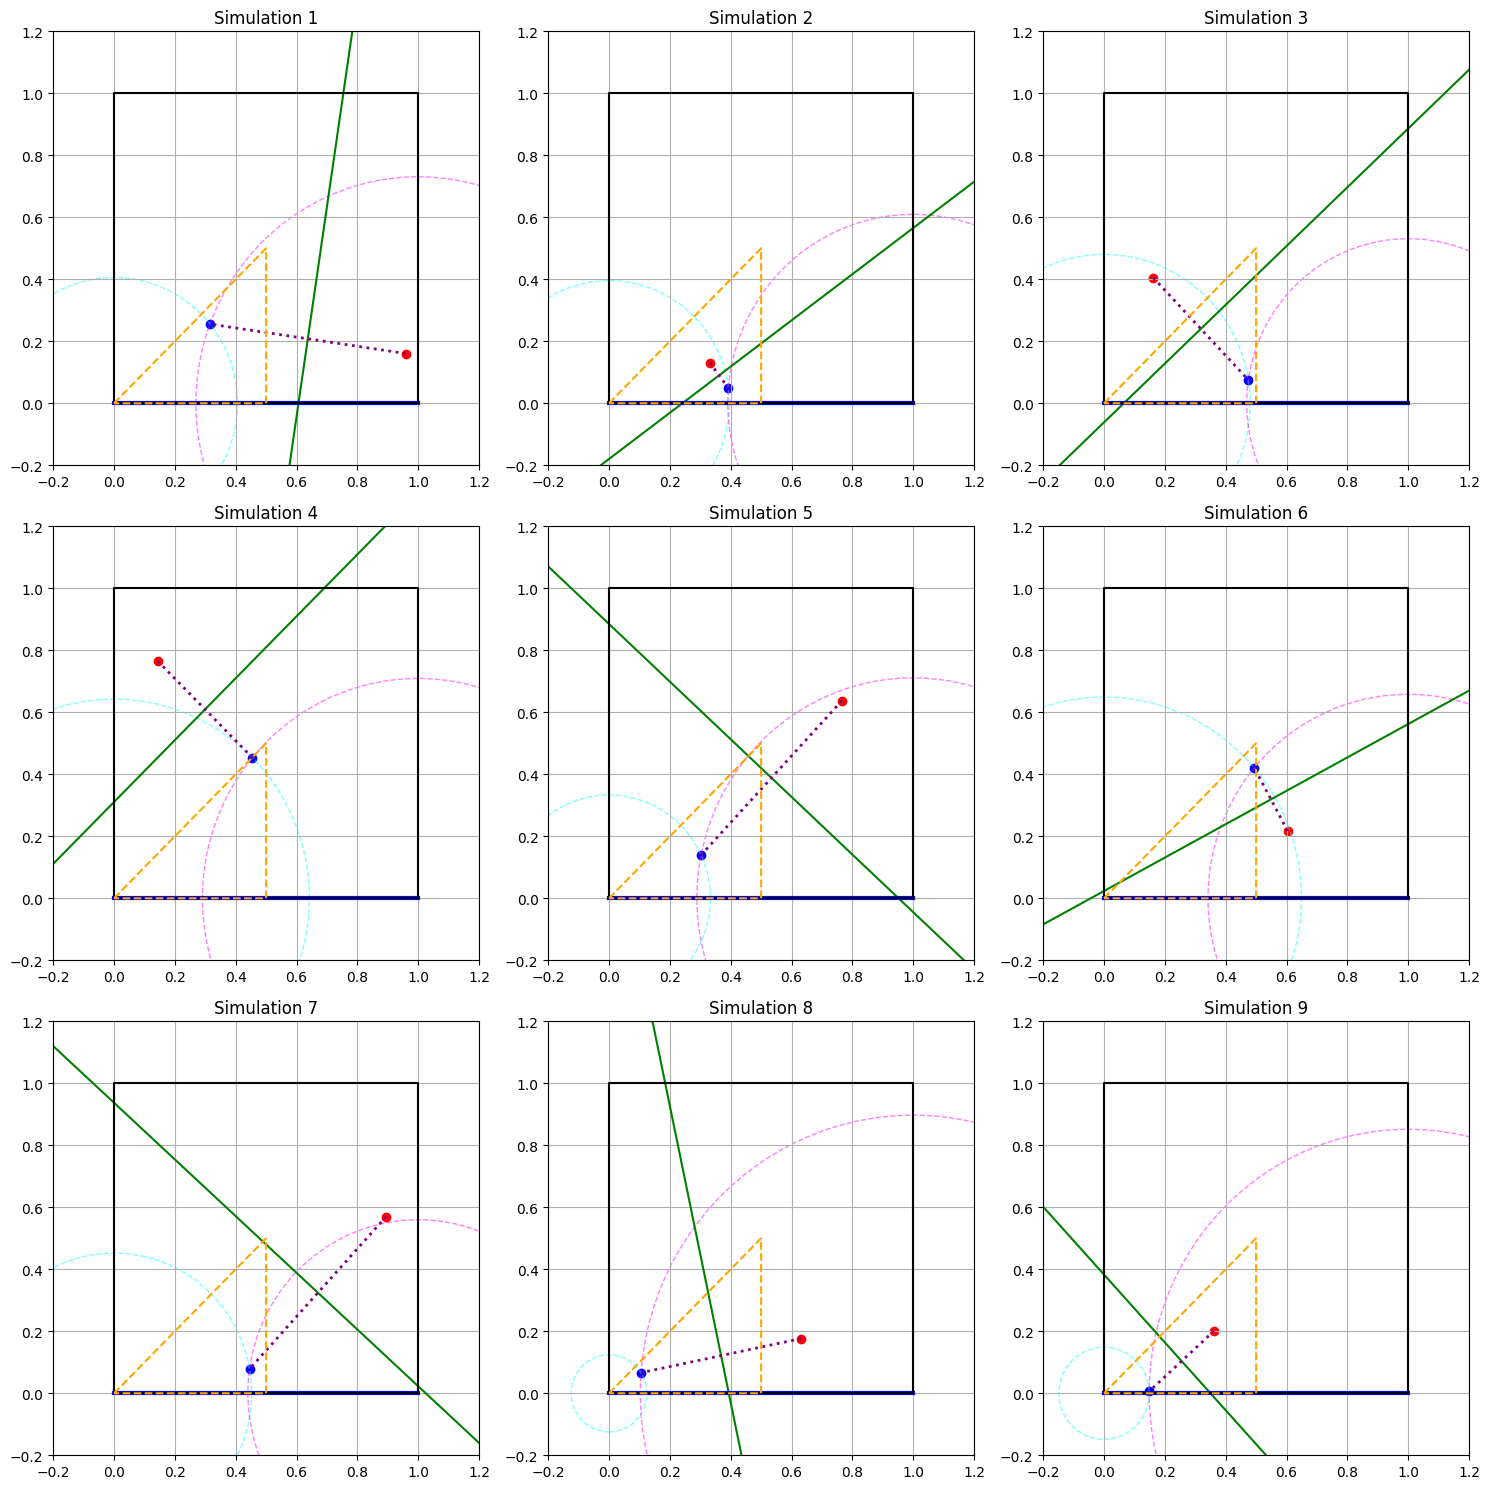

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

# Define the function for y-intersection of the perpendicular bisector
def y_intersection(x, R, B):
    x_r, y_r = R
    x_b, y_b = B
    # Handle the case where points R and B have the same y-coordinate
    if y_r == y_b:
        return (x_r + x_b) / 2
    # Return the y-coordinate of the bisector
    y = (y_r + y_b) / 2 - ((x_b - x_r) / (y_b - y_r)) * (x - (x_r + x_b) / 2)
    return y

# Function to simulate blue points inside the defined triangle
def simulate_blue_point():
    while True:
        x = np.random.uniform(0, 0.5)
        y = np.random.uniform(0, 1)
        if y <= x and y <= -x + 1:
            return (x, y)

# Function to add a clipped circle
def add_circle(ax, center, radius, color, label):
    circle = patches.Circle(center, radius, color=color, fill=False, linestyle='--', alpha=0.5)
    ax.add_patch(circle)

# Main function to graph the setup
def graph_bisector_simulations(num_simulations):
    fig, axs = plt.subplots(3, 3, figsize=(15, 15))
    axs = axs.flatten()  # Flatten the 3x3 array to iterate easily

    for i in range(num_simulations):
        ax = axs[i]
        # Define the points R and B
        R = (np.random.uniform(0, 1), np.random.uniform(0, 1))  # Example point R
        B = simulate_blue_point()  # Simulate a blue point inside the triangle

        # Calculate distances from point B to each side of the square
        dist_bottom = B[1] - 0
        dist_top = 1 - B[1]
        dist_left = B[0] - 0
        dist_right = 1 - B[0]
        
        # Determine the closest side
        distances = [dist_bottom, dist_top, dist_left, dist_right]
        closest_side = distances.index(min(distances))

        # Generate x values within the range of the square
        x_values = np.linspace(-2, 2, 400)

        # Check if points R and B have the same y-coordinate
        if R[1] == B[1]:
            bisector_x = y_intersection(None, R, B)
            y_values = np.linspace(-2, 2, 400)
        else:
            y_values = [y_intersection(x, R, B) for x in x_values]

        # Plot the bisector
        if R[1] == B[1]:
            ax.plot([bisector_x] * len(y_values), y_values, label='Perpendicular Bisector', color='green')
        else:
            ax.plot(x_values, y_values, label='Perpendicular Bisector', color='green')

        # Plot points R and B
        ax.scatter(*R, color='red', label='Point R')
        ax.scatter(*B, color='blue', label='Point B')

        # Highlight the closest side in blue
        if closest_side == 0:  # Bottom
            ax.plot([0, 1], [0, 0], color='blue', linewidth=3)
        elif closest_side == 1:  # Top
            ax.plot([0, 1], [1, 1], color='blue', linewidth=3)
        elif closest_side == 2:  # Left
            ax.plot([0, 0], [0, 1], color='blue', linewidth=3)
        elif closest_side == 3:  # Right
            ax.plot([1, 1], [0, 1], color='blue', linewidth=3)

        # Draw the dotted line segment between points R and B
        ax.plot([R[0], B[0]], [R[1], B[1]], color='purple', linestyle=':', linewidth=2)

        # Draw the 1x1 square
        square_x = [0, 1, 1, 0, 0]
        square_y = [0, 0, 1, 1, 0]
        ax.plot(square_x, square_y, color='black', label='1x1 Square')

        # Draw circles
        r1 = np.sqrt(B[0]**2 + B[1]**2)
        r2 = np.sqrt((B[0] - 1)**2 + B[1]**2)
        add_circle(ax, (0, 0), r1, 'cyan', 'Circle 1')
        add_circle(ax, (1, 0), r2, 'magenta', 'Circle 2')

        # Draw the triangle
        triangle_x = [0, 0.5, 0.5, 0]
        triangle_y = [0, 0.5, 0, 0]
        ax.plot(triangle_x, triangle_y, color='orange', linestyle='--', label='Triangle Region')

        # Set the limits to center the plot on the square
        ax.set_xlim(-0.2, 1.2)
        ax.set_ylim(-0.2, 1.2)

        # Add grid and title
        ax.grid(True)
        ax.set_title(f'Simulation {i + 1}')

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

# Run 9 simulations
graph_bisector_simulations(9)

# Fix the blue point and simulate random red points

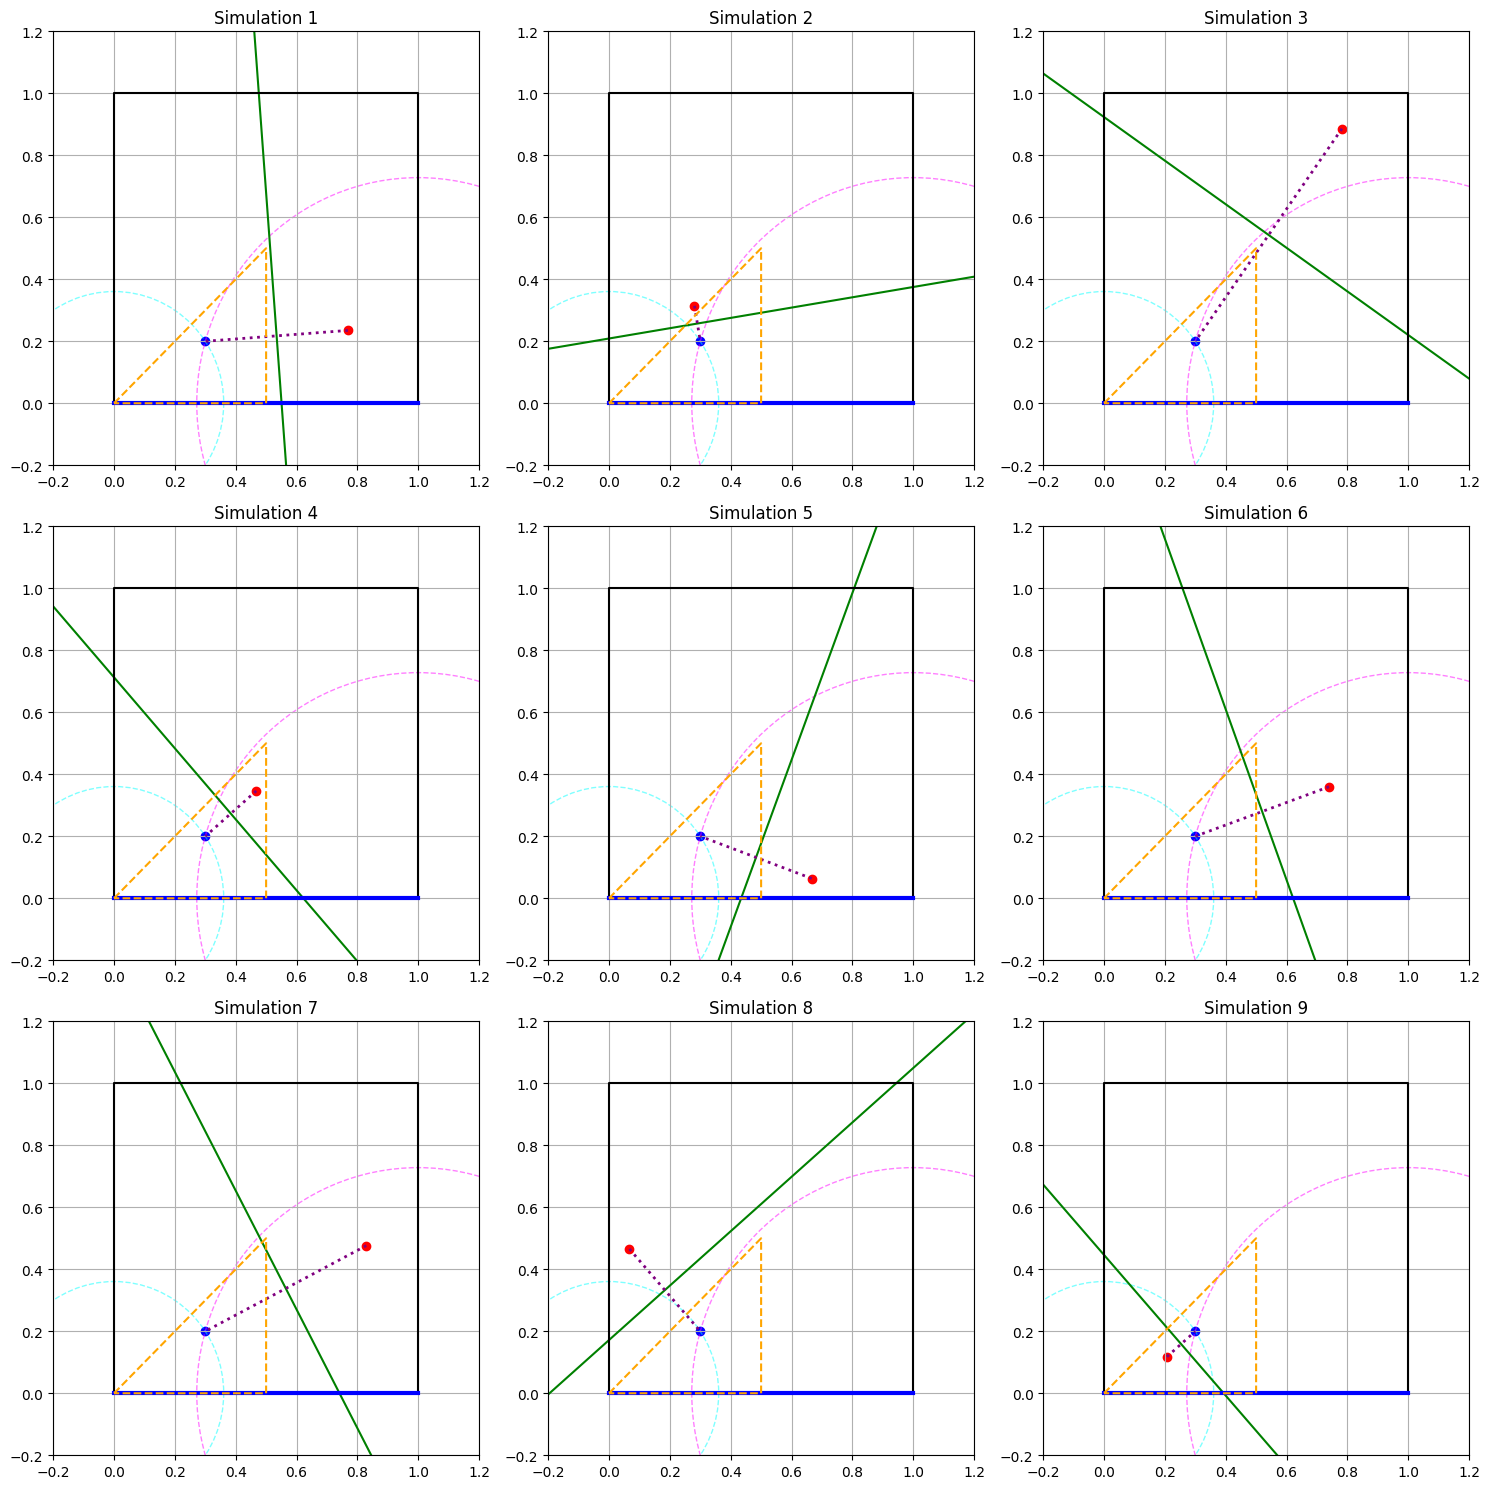

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

# Define the function for y-intersection of the perpendicular bisector
def y_intersection(x, R, B):
    x_r, y_r = R
    x_b, y_b = B
    # Handle the case where points R and B have the same y-coordinate
    if y_r == y_b:
        return (x_r + x_b) / 2
    # Return the y-coordinate of the bisector
    y = (y_r + y_b) / 2 - ((x_b - x_r) / (y_b - y_r)) * (x - (x_r + x_b) / 2)
    return y

# Function to simulate red points within the square
def simulate_red_point():
    return (np.random.uniform(0, 1), np.random.uniform(0, 1))

# Function to add a clipped circle
def add_circle(ax, center, radius, color, label):
    circle = patches.Circle(center, radius, color=color, fill=False, linestyle='--', alpha=0.5)
    ax.add_patch(circle)

# Main function to graph the setup
def graph_bisector_simulations(num_simulations, fixed_blue_point):
    fig, axs = plt.subplots(3, 3, figsize=(15, 15))
    axs = axs.flatten()  # Flatten the 3x3 array to iterate easily

    for i in range(num_simulations):
        ax = axs[i]
        
        # Simulate a red point
        R = simulate_red_point()
        
        # Fixed blue point
        B = fixed_blue_point

        # Calculate distances from point B to each side of the square
        dist_bottom = B[1] - 0
        dist_top = 1 - B[1]
        dist_left = B[0] - 0
        dist_right = 1 - B[0]
        
        # Determine the closest side
        distances = [dist_bottom, dist_top, dist_left, dist_right]
        closest_side = distances.index(min(distances))

        # Generate x values within the range of the square
        x_values = np.linspace(-2, 2, 400)

        # Check if points R and B have the same y-coordinate
        if R[1] == B[1]:
            bisector_x = y_intersection(None, R, B)
            y_values = np.linspace(-2, 2, 400)
        else:
            y_values = [y_intersection(x, R, B) for x in x_values]

        # Plot the bisector
        if R[1] == B[1]:
            ax.plot([bisector_x] * len(y_values), y_values, label='Perpendicular Bisector', color='green')
        else:
            ax.plot(x_values, y_values, label='Perpendicular Bisector', color='green')

        # Plot points R and B
        ax.scatter(*R, color='red', label='Point R')
        ax.scatter(*B, color='blue', label='Point B')

        # Draw the dotted line segment between points R and B
        ax.plot([R[0], B[0]], [R[1], B[1]], color='purple', linestyle=':', linewidth=2)

        # Draw the 1x1 square
        square_x = [0, 1, 1, 0, 0]
        square_y = [0, 0, 1, 1, 0]
        ax.plot(square_x, square_y, color='black', label='1x1 Square')

        # Highlight the closest side in blue
        if closest_side == 0:  # Bottom
            ax.plot([0, 1], [0, 0], color='blue', linewidth=3)
        elif closest_side == 1:  # Top
            ax.plot([0, 1], [1, 1], color='blue', linewidth=3)
        elif closest_side == 2:  # Left
            ax.plot([0, 0], [0, 1], color='blue', linewidth=3)
        elif closest_side == 3:  # Right
            ax.plot([1, 1], [0, 1], color='blue', linewidth=3)

        # Draw circles
        r1 = np.sqrt(B[0]**2 + B[1]**2)
        r2 = np.sqrt((B[0] - 1)**2 + B[1]**2)
        add_circle(ax, (0, 0), r1, 'cyan', 'Circle 1')
        add_circle(ax, (1, 0), r2, 'magenta', 'Circle 2')

        # Draw the triangle
        triangle_x = [0, 0.5, 0.5, 0]
        triangle_y = [0, 0.5, 0, 0]
        ax.plot(triangle_x, triangle_y, color='orange', linestyle='--', label='Triangle Region')

        # Set the limits to center the plot on the square
        ax.set_xlim(-0.2, 1.2)
        ax.set_ylim(-0.2, 1.2)

        # Add grid and title
        ax.grid(True)
        ax.set_title(f'Simulation {i + 1}')

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

# Fixed blue point
fixed_blue_point = (0.3, 0.2)  # Example fixed blue point

# Run 9 simulations
graph_bisector_simulations(9, fixed_blue_point)

# Fix the blue point inside the triangle and simulate red points inside the intersection of the two circles

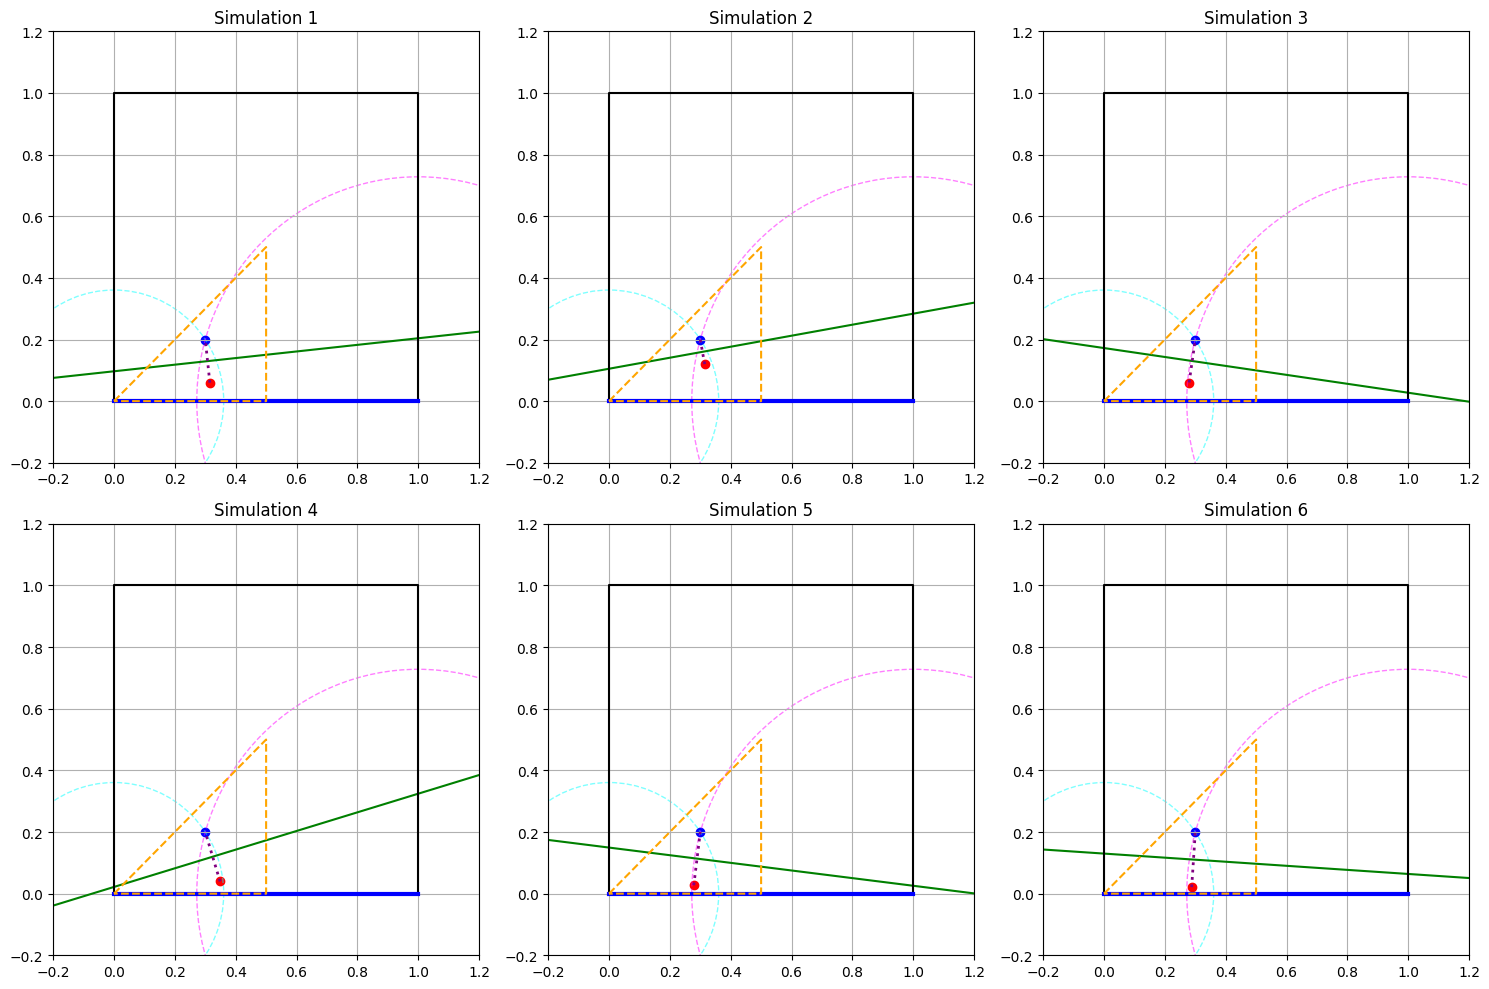

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from shapely.ops import unary_union

# Define the function for y-intersection of the perpendicular bisector
def y_intersection(x, R, B):
    x_r, y_r = R
    x_b, y_b = B
    # Handle the case where points R and B have the same y-coordinate
    if y_r == y_b:
        return (x_r + x_b) / 2
    # Return the y-coordinate of the bisector
    y = (y_r + y_b) / 2 - ((x_b - x_r) / (y_b - y_r)) * (x - (x_r + x_b) / 2)
    return y

# Function to simulate red points within the intersection of the circles
def simulate_red_point_in_intersection(center1, radius1, center2, radius2, inside = True):
    circle1 = Point(center1).buffer(radius1)
    circle2 = Point(center2).buffer(radius2)
    intersection = circle1.intersection(circle2)
    # Limit to the square
    square = Polygon([(0, 0), (1, 0), (1, 1), (0, 1)])
    intersection = intersection.intersection(square)

    # Generate random points in the intersection
    while True:
        minx, miny, maxx, maxy = intersection.bounds
        x = np.random.uniform(minx, maxx)
        y = np.random.uniform(miny, maxy)
        point = Point(x, y)
        if intersection.contains(point) and inside:
            return (x, y)
        elif not intersection.contains(point) and not inside:
            return (x, y)

# Function to add a clipped circle
def add_circle(ax, center, radius, color, label):
    circle = patches.Circle(center, radius, color=color, fill=False, linestyle='--', alpha=0.5)
    ax.add_patch(circle)

# Main function to graph the setup
def graph_bisector_simulations(num_simulations, fixed_blue_point):
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))
    axs = axs.flatten()  # Flatten the 3x3 array to iterate easily

    for i in range(num_simulations):
        ax = axs[i]
        # Fixed blue point
        B = fixed_blue_point

        # Circle parameters
        r1 = np.sqrt(B[0]**2 + B[1]**2)
        r2 = np.sqrt((B[0] - 1)**2 + B[1]**2)

        # Simulate a red point in the intersection of the circles
        R = simulate_red_point_in_intersection((0, 0), r1, (1, 0), r2)

        # Calculate distances from point B to each side of the square
        dist_bottom = B[1] - 0
        dist_top = 1 - B[1]
        dist_left = B[0] - 0
        dist_right = 1 - B[0]
        
        # Determine the closest side
        distances = [dist_bottom, dist_top, dist_left, dist_right]
        closest_side = distances.index(min(distances))

        # Generate x values within the range of the square
        x_values = np.linspace(-2, 2, 400)

        # Check if points R and B have the same y-coordinate
        if R[1] == B[1]:
            bisector_x = y_intersection(None, R, B)
            y_values = np.linspace(-2, 2, 400)
        else:
            y_values = [y_intersection(x, R, B) for x in x_values]

        # Plot the bisector
        if R[1] == B[1]:
            ax.plot([bisector_x] * len(y_values), y_values, label='Perpendicular Bisector', color='green')
        else:
            ax.plot(x_values, y_values, label='Perpendicular Bisector', color='green')

        # Plot points R and B
        ax.scatter(*R, color='red', label='Point R')
        ax.scatter(*B, color='blue', label='Point B')

        # Draw the dotted line segment between points R and B
        ax.plot([R[0], B[0]], [R[1], B[1]], color='purple', linestyle=':', linewidth=2)

        # Draw the 1x1 square
        square_x = [0, 1, 1, 0, 0]
        square_y = [0, 0, 1, 1, 0]
        ax.plot(square_x, square_y, color='black', label='1x1 Square')

        # Highlight the closest side in blue
        if closest_side == 0:  # Bottom
            ax.plot([0, 1], [0, 0], color='blue', linewidth=3)
        elif closest_side == 1:  # Top
            ax.plot([0, 1], [1, 1], color='blue', linewidth=3)
        elif closest_side == 2:  # Left
            ax.plot([0, 0], [0, 1], color='blue', linewidth=3)
        elif closest_side == 3:  # Right
            ax.plot([1, 1], [0, 1], color='blue', linewidth=3)

        # Draw the triangle
        triangle_x = [0, 0.5, 0.5, 0]
        triangle_y = [0, 0.5, 0, 0]
        ax.plot(triangle_x, triangle_y, color='orange', linestyle='--', label='Triangle Region')


        # Draw circles
        add_circle(ax, (0, 0), r1, 'cyan', 'Circle 1')
        add_circle(ax, (1, 0), r2, 'magenta', 'Circle 2')

        # Set the limits to center the plot on the square
        ax.set_xlim(-0.2, 1.2)
        ax.set_ylim(-0.2, 1.2)

        # Add grid and title
        ax.grid(True)
        ax.set_title(f'Simulation {i + 1}')

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

# Fixed blue point
fixed_blue_point = (0.3, 0.2)  # Example fixed blue point
# Run 9 simulations
graph_bisector_simulations(6, fixed_blue_point)